## Image recognition
Before we start: Runtime / Change runtime type / turn on GPU

[1. MNIST](#1.-MNIST) <br>
&emsp;&emsp; [1.1. Loading and visualization](#1.1.-Loading-and-visualization) <br>
&emsp;&emsp; [1.2. CNN classification](#1.2-CNN-classification) <br>
&emsp;&emsp;&emsp;&emsp; - [Data preparation](#Data-preparation) <br>
&emsp;&emsp;&emsp;&emsp; - [Network preparation](#Network-preparation) <br>
&emsp;&emsp;&emsp;&emsp; - [Training](#Training) <br>
&emsp;&emsp;&emsp;&emsp; - [Evaluation](#Evaluation) <br>

[2. FASHION MNIST](#2.-FASHION-MNIST) <br>
&emsp;&emsp; [2.1. Data loading and preparation](#2.1.-Data-loading-and-preparation) <br>
&emsp;&emsp; [2.2. Network preparation and training](#2.2.-Network-preparation-and-training) <br>
&emsp;&emsp; [2.3. Evaluation](#2.3.-Evaluation) <br>
&emsp;&emsp; [2.4. Early stopping](#2.4.-Early-stopping) <br>
&emsp;&emsp; [2.5. Improving the results](#2.5.-Improving-the-results) <br>

### 1. MNIST
**MNIST** (Modified National Institute of Standards and Technology), contains 70,000 handwritten digits (28x28 pixels in grayscale with values ​​0-255, i.e. 1 byte per pixel). The set is already divided into training and test data, it is very popular, so it is easy to compare our results with those published on the Internet. 


#### 1.1. Loading and visualization
Load `mnist` data into `X_train`, `y_train`, `X_test`, `y_test` variables.
https://keras.io/datasets/

In [1]:
from keras.datasets import mnist as dataset
import numpy as np 

(X_train, y_train), (X_test, y_test) = dataset.load_data() 
# X capital letter, because matrix
# y lowercase letter, because vector

11501568/11490434 [==============================] - 0s 0us/step


Now check and write:
* how many **training instances** do we have?
* how many **test instances** do we have?
* what are **pixel dimensions** of one image?
* how many **channels** does one picture have?
* how many **bytes** does one pixel take?
* what is the **minimum** and **maximum pixel value**?


In [2]:
print('Training instances: ', len(X_train))
print('Test instances: ', len(X_test))
print('Pixel dimensions of one image: ', X_train.shape[1:3], ' = ', X_train[0].shape)

Training instances:  60000
Test instances:  10000
Pixel dimensions of one image:  (28, 28)  =  (28, 28)


**Channel (digital image)** 
Color digital images are made of pixels, and pixels are made of combinations of primary colors represented by a series of code. A channel in this context is the grayscale image of the same size as a color image, made of just one of these primary colors. For instance, an image from a standard digital camera will have a <u>red, green and blue channel</u>. A <u>grayscale image has just one channel</u>. 


In [3]:
print('1 picture have: ', 1 if len(X_train[0].shape) == 2 else len(X_train[0].shape), 'channels')
print('1 pixel take: ',  X_train[0][0][0].nbytes, 'bytes')
print('minimum pixel value: ', X_train.min())
print('maximum pixel value: ', X_train.max())

1 picture have:  1 channels
1 pixel take:  1 bytes
minimum pixel value:  0
maximum pixel value:  255


Great, now:
* Draw the first 12 elements of training set.
* Write or draw labels for these 12 elements.
 

[Here are different color maps.](  
https://matplotlib.org/examples/color/colormaps_reference.html), which you can use in `imshow` function.

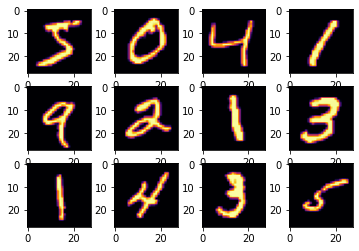

Labels of the above images:
[5 0 4 1]
[9 2 1 3]
[1 4 3 5]


In [4]:
import matplotlib.pyplot as plt

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='inferno')

plt.show()

print('Labels of the above images:')
for i in range(0,12,4):
    print(y_train[i:i+4])

Draw your student number using digits of `mnist` set. If your index is e.g. s12345, draw 5 pictures with the numbers '1', '2', '3', '4' and '5' next to each other.

Hypothetical student number for the task: s543210
Label indexes:  [0, 2, 7, 5, 3, 1]


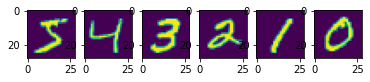

In [5]:
print("Hypothetical student number for the task: s543210")

my_num = [5,4,3,2,1,0]
indexes = []

for num in my_num:
    indexes.append(np.where(y_train == num)[0][0])

print('Label indexes: ',indexes)

#first way

for i in range(len(indexes)):
    plt.subplot(1, len(indexes),i+1)
    plt.imshow(X_train[indexes[i]], cmap='viridis')
plt.show()


0 0
1 2
2 7
3 5
4 3
5 1


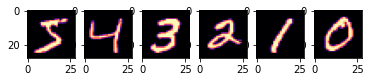

In [6]:
#Second way

for i,j in enumerate(indexes):
    print(i,j)
    plt.subplot(1, len(my_num),i+1)
    plt.imshow(X_train[j], cmap='magma')
plt.show()


#### 1.2. CNN classification
##### **Data preparation**
* Edit `X_train` and `X_test` so that all pixel values ​​are within <0,1>  range.
* Change type of our pixels to `float32`.

*Hint: The `astype` method may come in handy.*

In [7]:
X_train = X_train / 255
X_test = X_test / 255

print('Before change:')
print(type(X_train[0][0][0])) # float64, but keras wants float32
print(type(X_test[0][0][0]))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('\n')
print('After change:')
print(type(X_train[0][0][0]))
print(type(X_test[0][0][0]))

Before change:
<class 'numpy.float64'>
<class 'numpy.float64'>


After change:
<class 'numpy.float32'>
<class 'numpy.float32'>


We have prepared training data, now we will prepare labels. At the moment it is a vector of numbers - we have one number for each instance. Our network will have 10 values in output (the result for each class), so we need to rewrite our numbers to **one-hot**. If classes of three instances are e.g. [0, 3, 5], in form of one-hot we will have something like this:

[1000000000]  
[0001000000]  
[0000010000]

You can use [`to_categorical`](https://keras.io/api/utils/python_utils/) function for this.
* Convert labels to one-hot and enter results into `Y_train` and `Y_test` variables.
* List the first 10 elements of `Y_train` and `y_train`.
* Write how number labels 1, 2 and 4 will be written in new form.
* Write down digits of your index number using the above notation.

In [8]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print(Y_train[:10])
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]


In [9]:
uniq_nums = to_categorical(np.unique(y_train),num_classes=10)

nums = [1,2,4]
for num in nums:
    print(num, '-> ', uniq_nums[num])

1 ->  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 ->  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
4 ->  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
myStudentId = [5,4,3,2,1,0]

for num in myStudentId:
    print(num, '-> ', uniq_nums[num])

5 ->  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
4 ->  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
3 ->  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
2 ->  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 ->  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0 ->  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


First layers of our network will be `Conv2D` type. They take instance data in form of multidimensional arrays. So we don't flatten data into a vector - as we would have to do for `SVM` or `MLP`. This will be done by `Flatten` layer of our network later.

We pass instances to network in form of `width x height x channel_num` (`channels_last` format; in case of `channels_first` format array would have dimensions of: `channel_num x width x height`).

* Make sure we operate in `channels_last` mode (`keras.backend.image_data_format()`).
* Check shape of training and test data once again.
* If we are missing the last dimension, let's add it.


*Hint: `np.expand_dims(X_train, -1)` should add missing dimension to the end.*

 

In [ ]:
from keras import backend as K

#keras jest 'nakładką' na inne biblioteki
#kiedyś keras biblioteka Theano
#keras z defaultu korzysta z Tensorflow, ale można mu podłączyć różnie biblioteki

#Channel first czy pixel first - trzeba zawsze wiedzieć które!

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) #gdybyśmy mieli 3 kanały to zamiast 1 byłyby 3
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
    
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [ ]:
print(input_shape)
print(X_train[0].shape)
print(X_test[0].shape)

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


##### **Network preparation**
Probably, the following imports will be useful for us.

```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

#Conv2D - jeździ po obrazku (uczy się); filtry; robi sobie mapy aktywacji
#MaxPooling2D - ściska obrazek (nie uczy się)
#Flatten - z wielu obrazków robi jeden długi wektor (nie uczy się)
#Dense - warstwa perceptronów
#na końcu też będzie warstwa Dense

Build a network with such layers:
 * Input [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16  filters, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (we flatten the data into a 1-dimensional vector)
 * Output [Dense](https://keras.io/api/layers/core_layers/dense/), units as many as classes, [activation softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

The first layer will expect to provide shape of data (input_shape). So `width x height x channel_num`.

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

Check how your network looks like. <br>
`model.summary` method and `keras.utils.vis_utils.plot_model` function will be useful.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

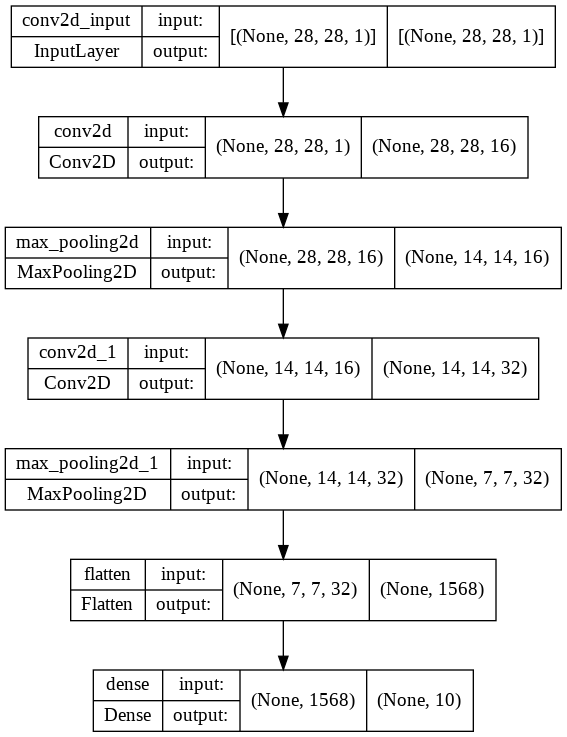

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

Try to **remove** `padding` argument and write down what has changed. **Restore** `padding`.

In [ ]:
model1 = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

**padding**: one of "valid" or "same" (case-insensitive). `"valid"` means no padding. `"same"` results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input <br>
<br>
source: https://keras.io/api/layers/convolution_layers/convolution2d/

What changed when `padding = 'same'` was removed? <br>
Output of `Conv2D` (2D Convolution Layer) changed dimensions, more precisely height and width of output matrix (left, right, bottom and top rows).

Answer the following questions:
* Does `Conv2D` layer learn during training? <br> Yes
* Does `MaxPooling2D` layer learn during training? <br> No
* Why do we put a `Flatten` layer in front of `Dense` layer(s)? <br>
`Flatten` layer gets to process images in the form of a matrix of certain height, width and very large depth, from which it makes one long 1-D vector. This is important because we want to pass this information later to a neural network (to `Dense` layer) which can only get input in 1-dimention.
* How many channels / activation maps will we have after passing the image through the first `Conv2D` layer of our network? <br>
The first `Conv2D` layer contains 16 filters, so we will have 16 activation maps.


Now run `compile` method: `loss = 'categorical_crossentropy'`, `optimizer = 'adam'`. `metrics` argument  takes an array of strings, we can e.g. track `'accuracy'` there.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

##### **Training**
Train the network. 100 `epochs`, `batch_size` 256.

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 12s 6ms/step - loss: 0.4836 - accuracy: 0.8778
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1202 - accuracy: 0.9645
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9848
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0391 - accuracy: 0.9881
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0361 - accur

##### **Evaluation**
* Make an evaluation of our model on training and test set (`evaluate` method).
* Enter results for both sets.
* Do the results differ? Why?

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9890


[0.06787275522947311, 0.9890000224113464]

In [ ]:
model.evaluate(X_train,Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 6.7388e-05 - accuracy: 1.0000


[6.738795491401106e-05, 1.0]

Training set is a set on which we taught our model, so evaluation on  training set will always be better compared to evaluation on test set, i.e. on data which model has not seen before.

### 2. FASHION MNIST
Now we will repeat experiment with a different, but very similar dataset. 

#### 2.1. Data loading and preparation
Load `fashion_mnist` set in the same way as `mnist`. Prepare training/test data and labels similar to `mnist`. Display the first 12 training instances. Prepare data and labels for training (same as in `mnist`).

In [11]:
from keras.datasets import fashion_mnist as dataset
import numpy as np

(X_train, y_train), (X_test, y_test) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


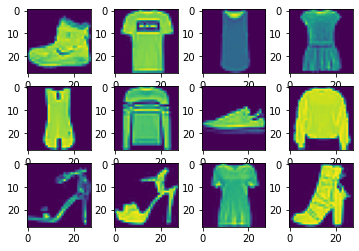

Labels of the above images:
[9 0 0 3]
[0 2 7 2]
[5 5 0 9]


In [12]:
import matplotlib.pyplot as plt

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='viridis')

plt.show()

print('Labels of the above images:')
for i in range(0,12,4):
    print(y_train[i:i+4])

In [ ]:
X_train, X_test = (X_train / 255).astype('float32'), (X_test / 255).astype('float32')

Y_train, Y_test = to_categorical(y_train), to_categorical(y_test)

#### 2.2. Network preparation and training
Create the same network as in `mnist` and do the training.

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

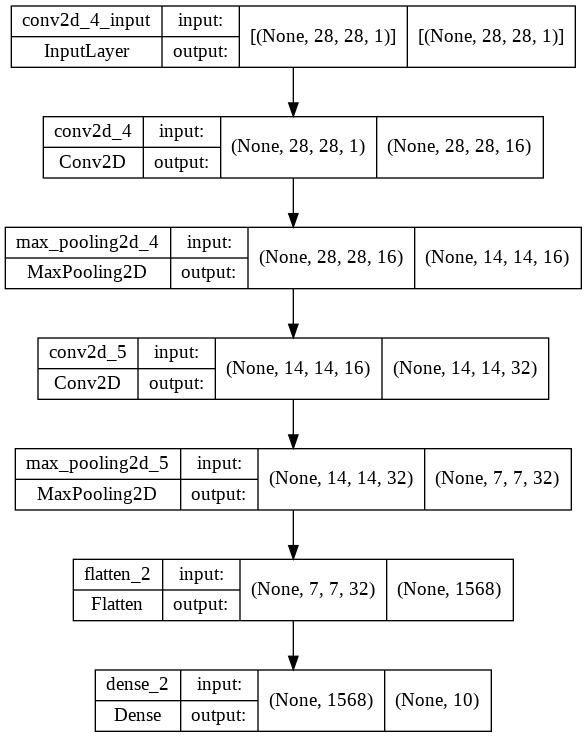

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.7125 - accuracy: 0.7573
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4202 - accuracy: 0.8517
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3674 - accuracy: 0.8702
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3406 - accuracy: 0.8803
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3202 - accuracy: 0.8863
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3048 - accuracy: 0.8929
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2940 - accuracy: 0.8966
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2834 - accuracy: 0.9002
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2763 - accuracy: 0.9023
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2671 - accura

#### 2.3. Evaluation
Make an evaluation of our model on training and test set (`evaluate` method). Enter the results for both sets.

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.9038


[0.3547145128250122, 0.9038000106811523]

In [ ]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9700


[0.08618155121803284, 0.9700333476066589]

#### 2.4. Early stopping
* Let's add a validation set to training - you can use `validation_split` argument of [`fit`](https://keras.io/api/models/model_training_apis/) method. Let's do 10%.
* Add [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5.
* Do two trainings - first monitoring `loss` in early stopping  and then `val_loss`. What is the difference?

If early stopping didn't work, increase the number of `epochs`. 

In [ ]:
from keras.callbacks import EarlyStopping 

es_loss = EarlyStopping(monitor='loss', patience=5, mode='min')

model.fit(X_train, Y_train, epochs=130, batch_size=256, validation_split=0.1, callbacks=[es_loss])

Epoch 1/130
211/211 [==============================] - 1s 7ms/step - loss: 0.0912 - accuracy: 0.9674 - val_loss: 0.1142 - val_accuracy: 0.9575
Epoch 2/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0875 - accuracy: 0.9697 - val_loss: 0.0998 - val_accuracy: 0.9617
Epoch 3/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0878 - accuracy: 0.9695 - val_loss: 0.0962 - val_accuracy: 0.9653
Epoch 4/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0855 - accuracy: 0.9705 - val_loss: 0.0946 - val_accuracy: 0.9662
Epoch 5/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0893 - accuracy: 0.9678 - val_loss: 0.1106 - val_accuracy: 0.9557
Epoch 6/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0884 - accuracy: 0.9686 - val_loss: 0.1080 - val_accuracy: 0.9555
Epoch 7/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0836 - accuracy: 0.9704 - val_loss: 0.1030 - val_accuracy: 0.9617

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5626 - accuracy: 0.9012


[0.5626116991043091, 0.901199996471405]

In [ ]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9806


[0.06507965177297592, 0.9805999994277954]

In [ ]:
es_val_loss = EarlyStopping(monitor='val_loss', patience=5, mode='min')

model.fit(X_train, Y_train, epochs=130, batch_size=256, validation_split=0.1, callbacks=[es_val_loss])

Epoch 1/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0443 - accuracy: 0.9843 - val_loss: 0.2951 - val_accuracy: 0.9220
Epoch 2/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.2814 - val_accuracy: 0.9273
Epoch 3/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0415 - accuracy: 0.9861 - val_loss: 0.2979 - val_accuracy: 0.9225
Epoch 4/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 0.2878 - val_accuracy: 0.9267
Epoch 5/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.2950 - val_accuracy: 0.9212
Epoch 6/130
211/211 [==============================] - 1s 6ms/step - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.3034 - val_accuracy: 0.9283
Epoch 7/130
211/211 [==============================] - 1s 5ms/step - loss: 0.0422 - accuracy: 0.9856 - val_loss: 0.2882 - val_accuracy: 0.9262

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5693 - accuracy: 0.9009


[0.5693358778953552, 0.9009000062942505]

In [ ]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9849


[0.05750519782304764, 0.9848999977111816]

Observations:
- when monitoring `loss`: EarlyStopping stopped training after 81 epochs.
- when monitoring `val_loss`: EarlyStopping stopped training after 7 epochs.


`val_loss` is the value of cost function for your cross-validation data and `loss` is the value of cost function for your training data (source: https://datascience.stackexchange.com/questions/25267/keras-difference-beetween-val-loss-and-loss-during-training) <br>
<br>
We want to **avoid overfitting**.

#### 2.5. Improving the results
* Try to create 3 NN that will score better on `fashion_mnist`. You can modify our simple network or design a completely new one.
* Experiment with modifying `Conv2D` layers (e.g. changing number of filters), adding `Conv2D` and `Dense` layers. You can also add `Dropout`.
* For each of these networks, conduct an evaluation and write down the results.

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#model1 (NN 1)

model1 = Sequential([
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es1 = EarlyStopping(monitor='val_loss', mode='min', patience=10)

mch1 = ModelCheckpoint(
    #save the best model observed during training for later use
    filepath="model1.h5",
    monitor='val_loss',
    mode='min',
    verbose=1, #=1 know the value of the performance measure and at what epoch the model was saved
    save_best_only=True
) 

model1.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[es1, mch1])

model1.load_weights('model1.h5')

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.7433
Epoch 1: val_loss improved from inf to 0.49114, saving model to model1.h5
211/211 [==============================] - 5s 20ms/step - loss: 0.7050 - accuracy: 0.7433 - val_loss: 0.4911 - val_accuracy: 0.8222
Epoch 2/100
211/211 [==============================] - ETA: 0s - loss: 0.3997 - accuracy: 0.8567
Epoch 2: val_loss improved from 0.49114 to 0.35991, saving model to model1.h5
211/211 [==============================] - 4s 18ms/step - loss: 0.3997 - accuracy: 0.8567 - val_loss: 0.3599 - val_accuracy: 0.8663
Epoch 3/100
209/211 [============================>.] - ETA: 0s - loss: 0.3462 - accuracy: 0.8755
Epoch 3: val_loss improved from 0.35991 to 0.33283, saving model to model1.h5
211/211 [==============================] - 4s 17ms/step - loss: 0.3461 - accuracy: 0.8756 - val_loss: 0.3328 - val_accuracy: 0.8737
Epoch 4/100
209/211 [============================>.] - ETA: 0s - loss: 0.3068 - acc

In [ ]:
m1_eval_test = model1.evaluate(X_test, Y_test)[1] #accuracy
m1_eval_train = model1.evaluate(X_train, Y_train)[1] 

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1824 - accuracy: 0.9354


In [ ]:
#model2 (NN 2)

model2 = Sequential([
    Conv2D(256, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es2 = EarlyStopping(monitor='val_loss', mode='min', patience=10)
mch2 = ModelCheckpoint(filepath="model2.h5", monitor='val_loss', mode='min', verbose=1, save_best_only=True) 

model2.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[es2, mch2])

model2.load_weights('model2.h5')

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.6222 - accuracy: 0.7722
Epoch 1: val_loss improved from inf to 0.37871, saving model to model2.h5
211/211 [==============================] - 9s 37ms/step - loss: 0.6222 - accuracy: 0.7722 - val_loss: 0.3787 - val_accuracy: 0.8623
Epoch 2/100
211/211 [==============================] - ETA: 0s - loss: 0.3434 - accuracy: 0.8754
Epoch 2: val_loss improved from 0.37871 to 0.31369, saving model to model2.h5
211/211 [==============================] - 7s 33ms/step - loss: 0.3434 - accuracy: 0.8754 - val_loss: 0.3137 - val_accuracy: 0.8847
Epoch 3/100
211/211 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.8927
Epoch 3: val_loss did not improve from 0.31369
211/211 [==============================] - 7s 33ms/step - loss: 0.2947 - accuracy: 0.8927 - val_loss: 0.3252 - val_accuracy: 0.8800
Epoch 4/100
211/211 [==============================] - ETA: 0s - loss: 0.2608 - accuracy: 0.9055
Epoch 4: val_loss

In [ ]:
m2_eval_test = model2.evaluate(X_test, Y_test)[1] #accuracy
m2_eval_train = model2.evaluate(X_train, Y_train)[1] 

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0935 - accuracy: 0.9682


In [ ]:
#model3 (NN 3)

model3 = Sequential([
    Conv2D(256, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es3 = EarlyStopping(monitor='val_loss', mode='min', patience=10)
mch3 = ModelCheckpoint(filepath="model3.h5", monitor='val_loss', mode='min', verbose=1, save_best_only=True) 

model3.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[es3, mch3])

model3.load_weights('model3.h5')

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.8818 - accuracy: 0.6687
Epoch 1: val_loss improved from inf to 0.50226, saving model to model3.h5
211/211 [==============================] - 8s 36ms/step - loss: 0.8818 - accuracy: 0.6687 - val_loss: 0.5023 - val_accuracy: 0.8038
Epoch 2/100
211/211 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.8246
Epoch 2: val_loss improved from 0.50226 to 0.40359, saving model to model3.h5
211/211 [==============================] - 7s 34ms/step - loss: 0.4642 - accuracy: 0.8246 - val_loss: 0.4036 - val_accuracy: 0.8513
Epoch 3/100
211/211 [==============================] - ETA: 0s - loss: 0.3758 - accuracy: 0.8626
Epoch 3: val_loss improved from 0.40359 to 0.36279, saving model to model3.h5
211/211 [==============================] - 7s 34ms/step - loss: 0.3758 - accuracy: 0.8626 - val_loss: 0.3628 - val_accuracy: 0.8673
Epoch 4/100
211/211 [==============================] - ETA: 0s - loss: 0.3218 - acc

In [ ]:
m3_eval_test = model3.evaluate(X_test, Y_test)[1] #accuracy
m3_eval_train = model3.evaluate(X_train, Y_train)[1] 

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1694 - accuracy: 0.9395


**Summary**

In [ ]:
print('Model 1:')
print('- accuracy (test set): ', m1_eval_test)
print('- accuracy (train set): ', m1_eval_train)
print('\n')
print('Model 2:')
print('- accuracy (test set): ', m2_eval_test)
print('- accuracy (train set): ', m2_eval_train)
print('\n')
print('Model 3:')
print('- accuracy (test set): ', m3_eval_test)
print('- accuracy (train set): ', m3_eval_train)
print('\n')
print('Model 0:')
print('- accuracy (test set): ', model.evaluate(X_test, Y_test)[1])
print('- accuracy (train set): ', model.evaluate(X_train, Y_train)[1])

Model 1:
- accuracy (test set):  0.9107999801635742
- accuracy (train set):  0.9353500008583069


Model 2:
- accuracy (test set):  0.9210000038146973
- accuracy (train set):  0.9682000279426575


Model 3:
- accuracy (test set):  0.9125999808311462
- accuracy (train set):  0.93954998254776


Model 0:
313/313 [==============================] - 1s 3ms/step - loss: 0.5693 - accuracy: 0.9009
- accuracy (test set):  0.9009000062942505
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9849
- accuracy (train set):  0.9848999977111816
